In [1]:

# imports
import os
import sys
import types
import json
import base64

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96
interactivity = ''
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = "figure"

  # IPython 7.14 deprecated set_matplotlib_formats from IPython
  try:
    from matplotlib_inline.backend_inline import set_matplotlib_formats
  except ImportError:
    # Fall back to deprecated location for older IPython versions
    from IPython.display import set_matplotlib_formats
    
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
run_path = 'L2hvbWUvbWlrZW5ndXllbi9wcm9qZWN0L3RpZHlmaW5hbmNl'
if run_path:
  # hex-decode the path
  run_path = base64.b64decode(run_path.encode("utf-8")).decode("utf-8")
  os.chdir(run_path)

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define
globals()["__spec__"] = None

{"/opt/anaconda3/lib/python3.13/importlib/_bootstrap.py": 1749745530.584952, "/opt/anaconda3/lib/python3.13/importlib/_bootstrap_external.py": 1749745530.5809522, "/opt/anaconda3/lib/python3.13/zipimport.py": 1749745530.2849557, "/opt/anaconda3/lib/python3.13/codecs.py": 1749745530.164957, "/opt/anaconda3/lib/python3.13/encodings/aliases.py": 1749745530.3809545, "/opt/anaconda3/lib/python3.13/encodings/__init__.py": 1749745530.428954, "/opt/anaconda3/lib/python3.13/encodings/utf_8.py": 1749745530.4809532, "/opt/anaconda3/lib/python3.13/abc.py": 1749745530.1569571, "/opt/anaconda3/lib/python3.13/io.py": 1749745530.2049568, "/opt/anaconda3/lib/python3.13/stat.py": 1749745530.256956, "/opt/anaconda3/lib/python3.13/_collections_abc.py": 1749745530.168957, "/opt/anaconda3/lib/python3.13/genericpath.py": 1749745530.1929567, "/opt/anaconda3/lib/python3.13/posixpath.py": 1749745530.2289565, "/opt/anaconda3/lib/python3.13/os.py": 1749745530.2209566, "/opt/anaconda3/lib/python3.13/_sitebuiltins.

In [2]:
import pandas as pd
import numpy as np
import sqlite3
import statsmodels.api as sm

from plotnine import *
from mizani.formatters import percent_format
from regtabletotext import prettify_result

In [3]:
tidy_finance = sqlite3.connect(database="data/tidy_finance_python.sqlite")

prices_monthly = (pd.read_sql_query(
    sql="SELECT symbol, date, ret_excess, mktcap_lag FROM prices_monthly",
    con=tidy_finance,
    parse_dates={"date"})
)

factors_ff3_monthly = pd.read_sql_query(
  sql="SELECT date, mkt_excess FROM factors_ff3_monthly",
  con=tidy_finance,
  parse_dates={"date"}
)

beta = pd.read_sql_query(
  sql="SELECT symbol, date, beta FROM beta_monthly",
  con=tidy_finance,
  parse_dates={"date"}
)

In [4]:
beta_lag = (beta
  .assign(date=lambda x: x["date"]+pd.DateOffset(months=1))
  .get(["symbol", "date", "beta"])
  .rename(columns={"beta": "beta_lag"})
  .dropna()
)

data_for_sorts = (prices_monthly
  .merge(beta_lag, how="inner", on=["symbol", "date"])
  .dropna()
)

In [5]:
beta_portfolios = (
    data_for_sorts
    .groupby("date")
    .apply(lambda x: (
        x.assign(
            portfolio=pd.qcut(x["beta_lag"], q=[0, 0.5, 1], labels=["low", "high"]),
            date=x.name
        )
    ))
    .reset_index(drop=True)
    .groupby(["portfolio", "date"])
    .apply(lambda x: np.average(x["ret_excess"], weights=x["mktcap_lag"]))
    .reset_index(name="ret")
    .dropna(subset=['ret'])
)
beta_portfolios.head()

,portfolio,date,ret
0,low,2016-08-31,-0.016507
1,low,2016-09-30,-0.089155
2,low,2016-11-30,-0.015080
3,low,2017-01-31,0.004113
4,low,2017-02-28,0.035101


In [6]:
beta_longshort = (beta_portfolios
  .pivot_table(index="date", columns="portfolio", values="ret")
  .reset_index()
  .assign(long_short=lambda x: x["high"]-x["low"])
)

In [7]:
model_fit = (sm.OLS.from_formula(
    formula="long_short ~ 1",
    data=beta_longshort
  )
  .fit(cov_type="HAC", cov_kwds={"maxlags": 6})
)
prettify_result(model_fit)

OLS Model:
long_short ~ 1

Coefficients:
           Estimate  Std. Error  t-Statistic  p-Value
Intercept     0.006       0.006        1.018    0.309

Summary statistics:
- Number of observations: 53
- R-squared: 0.000, Adjusted R-squared: 0.000
- F-statistic not available



In [8]:
def assign_portfolio(data, sorting_variable, n_portfolios):
    """Assign portfolios to a bin between breakpoints."""
    
    breakpoints = np.quantile(
      data[sorting_variable].dropna(), 
      np.linspace(0, 1, n_portfolios + 1), 
      method="linear"
    )
    
    assigned_portfolios = pd.cut(
      data[sorting_variable],
      bins=breakpoints,
      labels=range(1, breakpoints.size),
      include_lowest=True,
      right=False
    )
    
    return assigned_portfolios

In [9]:
beta_portfolios = (data_for_sorts
  .groupby("date")
  .apply(lambda x: x.assign(
      portfolio=assign_portfolio(x, "beta_lag", 10)
    ), include_groups=False
  )
  .reset_index(level="date")
  .groupby(["portfolio", "date"])
  .apply(lambda x: pd.Series({
      "ret": np.average(x["ret_excess"], weights=x["mktcap_lag"])
    }), include_groups=False
  )
  .reset_index()
  .merge(factors_ff3_monthly, how="left", on="date")
)

In [10]:
beta_portfolios_summary = (beta_portfolios
  .groupby("portfolio")
  .apply(lambda x: pd.Series({
      "alpha": sm.OLS.from_formula(
          formula="ret ~ 1 + mkt_excess", 
          data=x
        ).fit().params["Intercept"],
      "beta": sm.OLS.from_formula(
          formula="ret ~ 1 + mkt_excess", 
          data=x
        ).fit().params["mkt_excess"],
      "ret": x["ret"].mean()
    }), include_groups=False
  )
  .reset_index()
)
beta_portfolios_summary

,portfolio,alpha,beta,ret
0,1,0.007031,0.356225,0.003892
1,2,-0.004215,0.227882,-0.005509
2,3,-0.010169,0.390216,-0.011241
3,4,-0.014205,0.388342,-0.015732
4,5,-0.007220,0.616833,-0.009723
5,6,0.010648,0.976502,0.006577
6,7,-0.010739,0.679145,-0.012645
7,8,-0.002757,0.991774,-0.006963
8,9,-0.003448,0.904886,-0.007174
9,10,0.010675,1.376356,0.004944


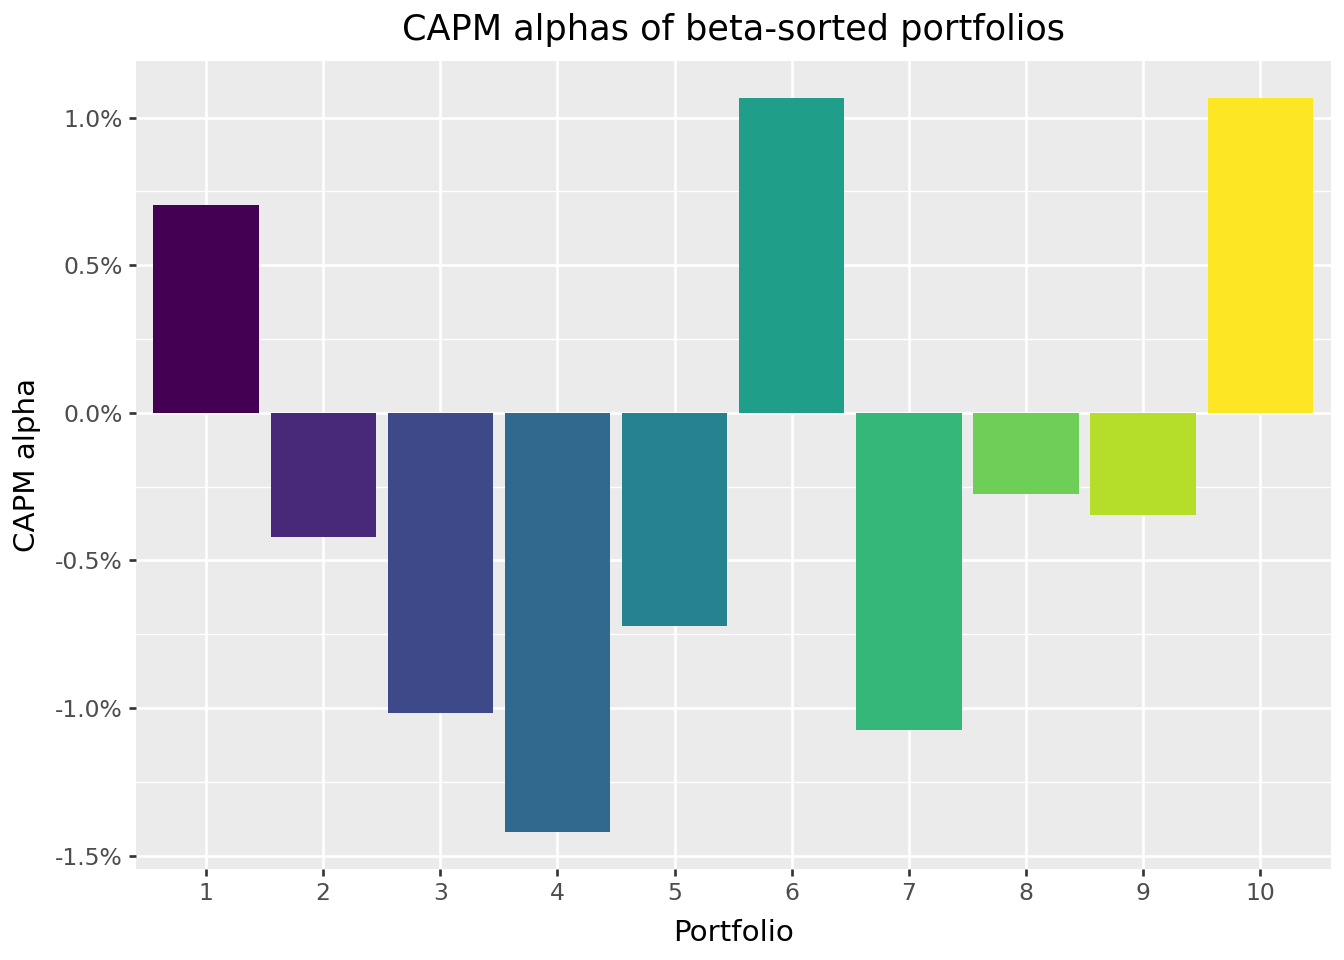

In [11]:
#| label: fig-701
#| fig-cap: The figure shows CAPM alphas of beta-sorted portfolios. Portfolios are sorted into deciles each month based on their estimated CAPM beta. The bar charts indicate the CAPM alpha of the resulting portfolio returns during the sample period.
#| fig-alt: 'Title: CAPM alphas of beta-sorted portfolios. The figure shows bar charts of alphas of beta-sorted portfolios with the decile portfolio on the horizontal axis and the corresponding CAPM alpha on the vertical axis.'
#| fig-pos: htb
beta_portfolios_figure = (
  ggplot(
    beta_portfolios_summary, 
    aes(x="portfolio", y="alpha", fill="portfolio")
  )
  + geom_bar(stat="identity")
  + labs(
      x="Portfolio", y="CAPM alpha", fill="Portfolio",
      title="CAPM alphas of beta-sorted portfolios"
    )
  + scale_y_continuous(labels=percent_format())
  + theme(legend_position="none")
)
beta_portfolios_figure.show()

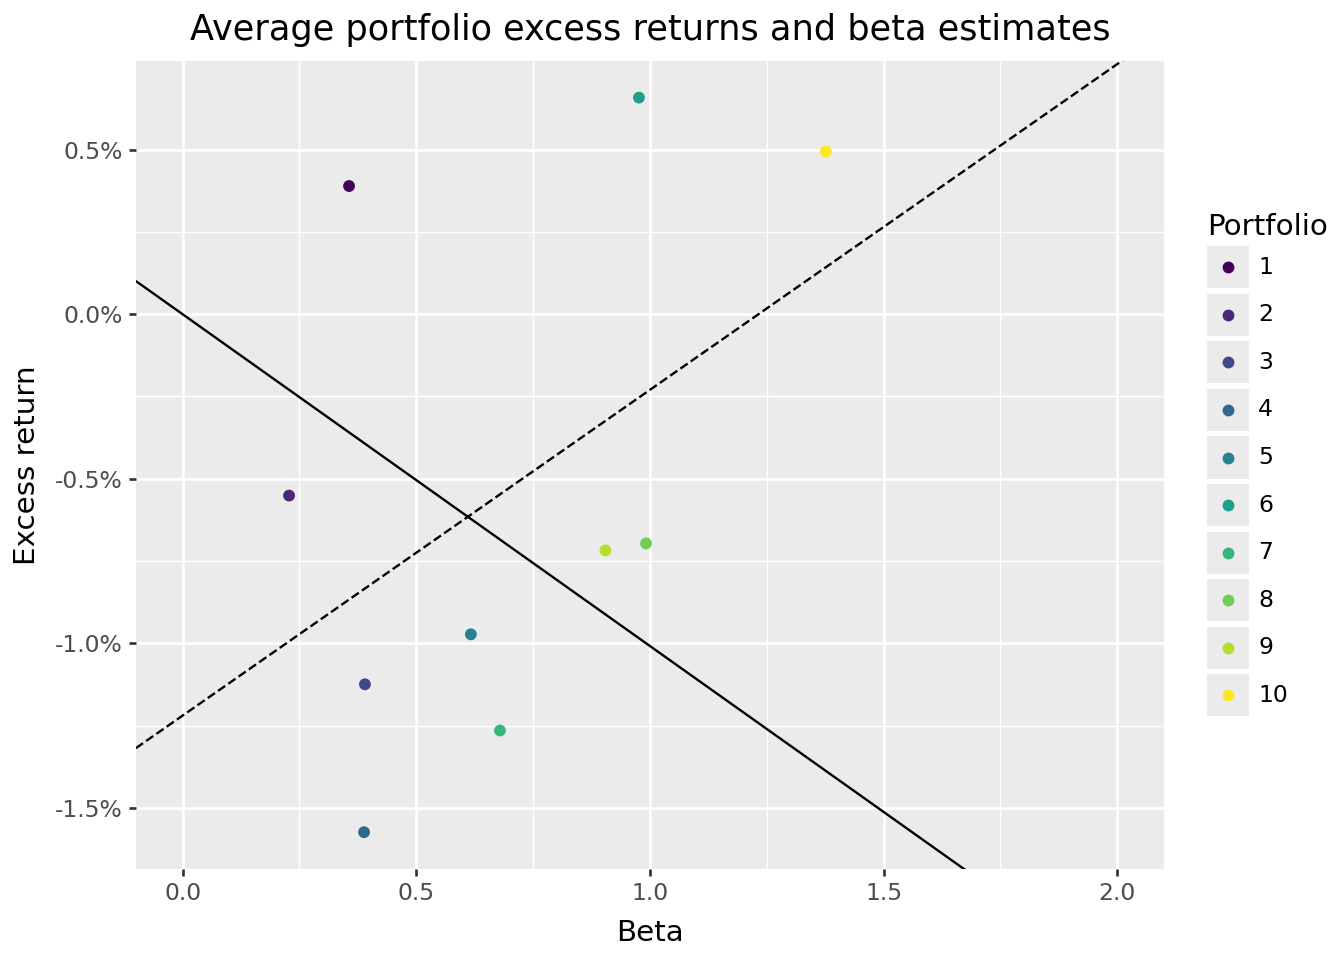

In [12]:
#| label: fig-702
#| fig-cap: The figure shows average portfolio excess returns and beta estimates. Excess returns are computed as CAPM alphas of the beta-sorted portfolios. The horizontal axis indicates the CAPM beta of the resulting beta-sorted portfolio return time series. The dashed line indicates the slope coefficient of a linear regression of excess returns on portfolio betas.
#| fig-alt: 'Title: Average portfolio excess returns and beta estimates. The figure shows a scatter plot of the average excess returns per beta portfolio with average beta estimates per portfolio on the horizontal axis and average excess returns on the vertical axis. An increasing solid line indicates the security market line. A dashed increasing line with lower slope than the security market line indicates that the CAPM prediction is not valid for the data.'
#| fig-pos: htb
sml_capm = (sm.OLS.from_formula(
    formula="ret ~ 1 + beta", 
    data=beta_portfolios_summary
  )
  .fit()
  .params
)

sml_figure = (
  ggplot(
    beta_portfolios_summary,
    aes(x="beta", y="ret", color="factor(portfolio)")
  )
  + geom_point()
  + geom_abline(
      intercept=0, slope=factors_ff3_monthly["mkt_excess"].mean(), linetype="solid"
    )
  + geom_abline(
      intercept=sml_capm["Intercept"], slope=sml_capm["beta"], linetype="dashed"
    )
  + labs(
      x="Beta", y="Excess return", color="Portfolio",
      title="Average portfolio excess returns and beta estimates"
    )
  + scale_x_continuous(limits=(0, 2))
  + scale_y_continuous(labels=percent_format())
)
sml_figure.show()

In [13]:
beta_longshort = (beta_portfolios
  .assign(
    portfolio=lambda x: (
      x["portfolio"].apply(
        lambda y: "high" if y == x["portfolio"].max()
        else ("low" if y == x["portfolio"].min()
        else y)
      )
    )
  )
  .query("portfolio in ['low', 'high']")
  .pivot_table(index="date", columns="portfolio", values="ret")
  .assign(long_short=lambda x: x["high"]-x["low"])
  .merge(factors_ff3_monthly, how="left", on="date")
)

In [14]:
model_fit = (sm.OLS.from_formula(
    formula="long_short ~ 1", 
    data=beta_longshort
  )
  .fit(cov_type="HAC", cov_kwds={"maxlags": 1})
)
prettify_result(model_fit)

OLS Model:
long_short ~ 1

Coefficients:
           Estimate  Std. Error  t-Statistic  p-Value
Intercept     0.001       0.011        0.095    0.924

Summary statistics:
- Number of observations: 53
- R-squared: 0.000, Adjusted R-squared: 0.000
- F-statistic not available



In [15]:
model_fit = (sm.OLS.from_formula(
    formula="long_short ~ 1 + mkt_excess", 
    data=beta_longshort
  )
  .fit(cov_type="HAC", cov_kwds={"maxlags": 1})
)
prettify_result(model_fit)

OLS Model:
long_short ~ 1 + mkt_excess

Coefficients:
            Estimate  Std. Error  t-Statistic  p-Value
Intercept      0.004       0.009        0.394    0.694
mkt_excess     1.020       0.116        8.784    0.000

Summary statistics:
- Number of observations: 52
- R-squared: 0.527, Adjusted R-squared: 0.518
- F-statistic: 77.156 on 1 and 50 DF, p-value: 0.000



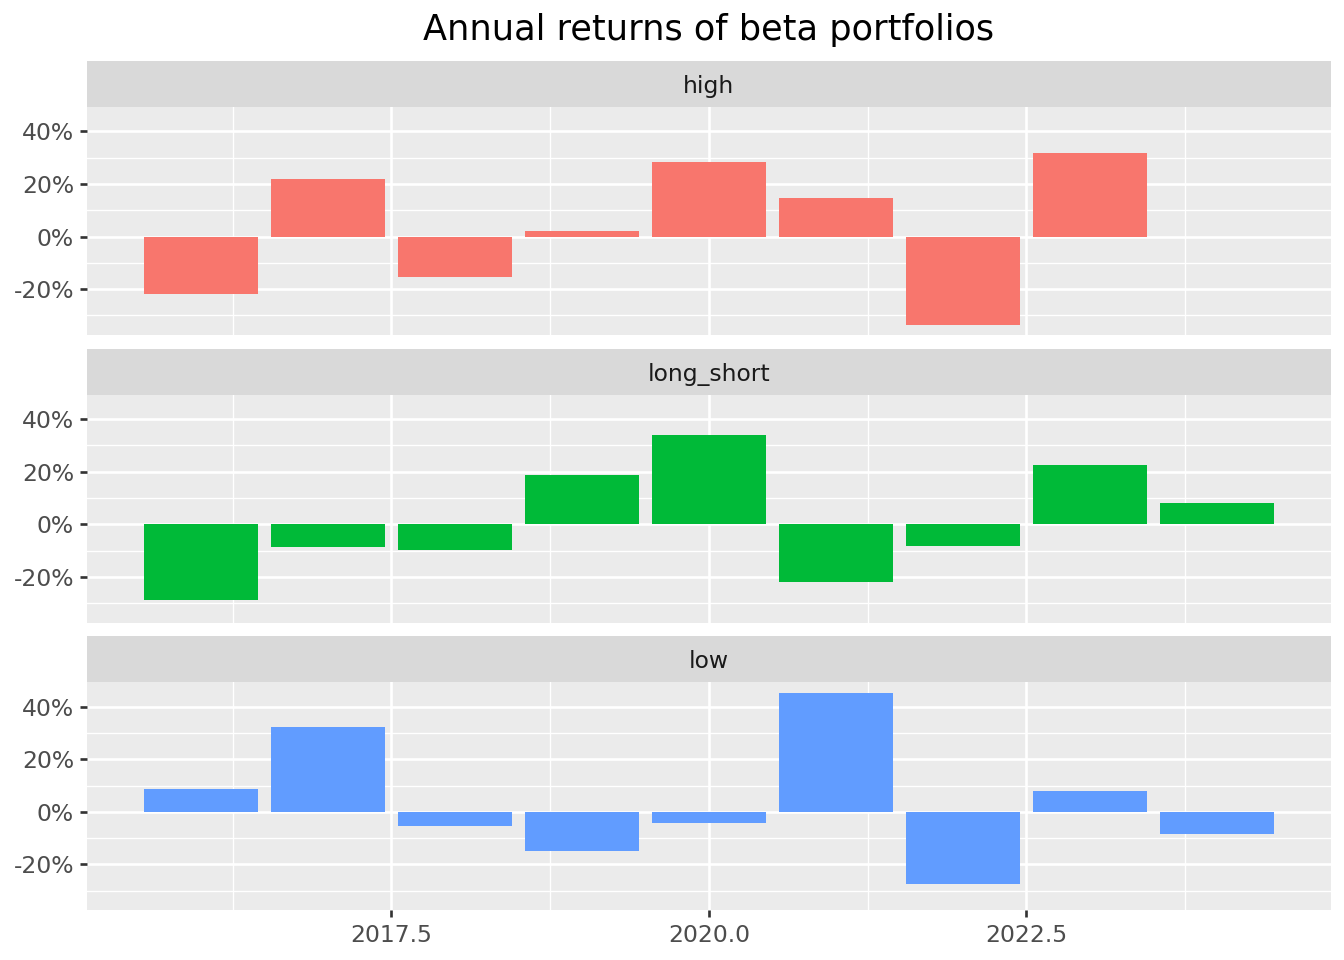

In [16]:
#| label: fig-703
#| fig-cap: The figure shows annual returns of beta portfolios. We construct portfolios by sorting stocks into high and low based on their estimated CAPM beta. Long short indicates a strategy that goes long into high beta stocks and short low beta stocks.
#| fig-alt: 'Title: Annual returns of beta portfolios. The figure shows bar charts of annual returns of long, short, and long-short beta portfolios with years on the horizontal axis and returns on the vertical axis. Each portfolio is plotted in its own facet.'
#| fig-pos: htb
beta_longshort_year = (beta_longshort
  .assign(year=lambda x: x["date"].dt.year)
  .groupby("year")
  .aggregate(
    low=("low", lambda x: (1+x).prod()-1),
    high=("high", lambda x: (1+x).prod()-1),
    long_short=("long_short", lambda x: (1+x).prod()-1)
  )
  .reset_index()
  .melt(id_vars="year", var_name="name", value_name="value")
)

beta_longshort_figure = (
  ggplot(
    beta_longshort_year, 
    aes(x="year", y="value", fill="name")
  )
  + geom_col(position="dodge")
  + facet_wrap("~name", ncol=1)
  + labs(x="", y="", title="Annual returns of beta portfolios")
  + scale_y_continuous(labels=percent_format())
  + theme(legend_position="none")
)
beta_longshort_figure.show()